# XGBBoost MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, fbeta_score

## Data

In [2]:
full_train = pd.read_csv("../../../data/csev/model_5/trainCSEV.csv")
full_test = pd.read_csv("../../../data/csev/model_5/testCSEV.csv")

In [3]:
Y_train = full_train['C_SEV']
X_train = full_train.drop(['C_SEV'], axis=1)
Y_train.value_counts()

1    27796
0    27794
Name: C_SEV, dtype: int64

In [4]:
Y_test = full_test['C_SEV']
X_test = full_test.drop(['C_SEV'], axis=1)
Y_test.value_counts()

1    351139
0      6949
Name: C_SEV, dtype: int64

## XGB Classifier

In [5]:
model = XGBClassifier(use_label_encoder=False)

In [6]:
model.fit(X_train, Y_train)

[23:37:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [7]:
Y_pred = model.predict(X_test)

## Evaluation

In [8]:
metrics.accuracy_score(Y_test, Y_pred)

0.6807153548848328

Matriz de confusión
[[  4580   2369]
 [111963 239176]]
Matriz de confusión normalizada
[[0.65908764 0.34091236]
 [0.31885664 0.68114336]]


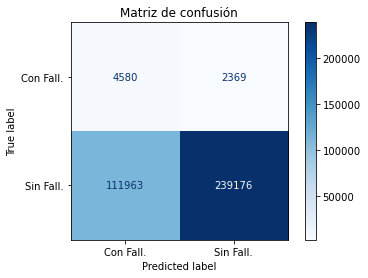

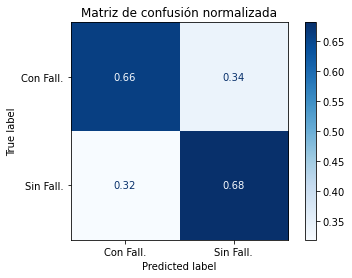

In [9]:
titles_options = [
    ("Matriz de confusión", None),
    ("Matriz de confusión normalizada", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,
        display_labels=['Con Fall.', 'Sin Fall.'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [10]:
print("Classification Report")
print(classification_report(Y_test, Y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.66      0.07      6949
           1       0.99      0.68      0.81    351139

    accuracy                           0.68    358088
   macro avg       0.51      0.67      0.44    358088
weighted avg       0.97      0.68      0.79    358088



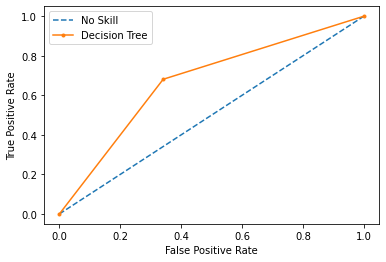

In [11]:
# Curva ROC
# keep probabilities for the positive outcome only
yhat = Y_pred
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [12]:
fbeta_score(Y_test, Y_pred, average='binary', beta=2)

0.72649248132405